<a href="https://colab.research.google.com/github/QianFu520/project2/blob/main/Project_2_Part_3_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Qian Fu
*   8/18/2022



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Wine.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


# Data Cleaning

**Deleted unnecessary columns**

In [ ]:
#I decided to delete country column, because there is only one country: Espana, it doesn't make impact on predicting the wine price.
df.drop(columns="country", inplace= True)

**Check and drop any duplicates**

In [ ]:
#check for duplicates
df.duplicated().sum()

5452

In [ ]:
#Drop all the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(2048, 10)

# **Identify and address any missing values in this dataset.**


In [ ]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

I can see that there are 2 missing values in 'year' column, 106 missing values in "type" column, 271 missing values in "body" column, and 271 missing values in "acidity" column.

**Figure out the method for dealing with the missing values in type column**

In [ ]:
#check the value count in type column
df["type"].value_counts()

Ribera Del Duero Red    535
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              73
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64

To prevent model performance bias, for missing values in type column, I decided to create a new label"Unidentified". I will deal with this after data split.

**Figure out the method for dealing with the missing values in year column**



In [ ]:
missing_values = pd.isna(df["year"])
df[missing_values]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Vino de Espana,40.0,Tempranillo,4.0,2.0


I will fill the missing values in "year"column with the most recent year.I will deal with it after data split.

**Figure out the method for dealing with the missing values in body and acidity column**

In [ ]:
#check the stats information of body column
df["body"].describe().round(1)

count    1777.0
mean        4.3
std         0.7
min         2.0
25%         4.0
50%         4.0
75%         5.0
max         5.0
Name: body, dtype: float64

In [ ]:
#check the most frequent value 
df["body"].value_counts()

4.0    1003
5.0     634
3.0     106
2.0      34
Name: body, dtype: int64

I can see that the most frequent body value is 4.0, the mean value of the body is around 4.3. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in body column.I will address this after the data split

In [ ]:
#check the stats information of acidity column
df["acidity"].describe().round(1)

count    1777.0
mean        2.9
std         0.3
min         1.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: acidity, dtype: float64

In [ ]:
#check the most frequent value
df["acidity"].value_counts()

3.0    1672
2.0      70
1.0      35
Name: acidity, dtype: int64

I can see that the most frequent acidity value is 3.0, the mean value of the body is around 2.9. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in acidity column.I will address this after the data split

# Identified and corrected inconsistencies in data for categorical values

In [ ]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=="object"].index
for col in str_cols:
  print(f'-Column={col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

-Column=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



-Column=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1


I can't tell there are inconsistencies in data for categorical values

# Ensure all columns data types are correct

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   region       2048 non-null   object 
 6   price        2048 non-null   float64
 7   type         1942 non-null   object 
 8   body         1777 non-null   float64
 9   acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 176.0+ KB


I can see that the data type of "year" column is not correct. I will change it from object to inter.

In [ ]:
df["year"] = df["year"].astype(int)
df.dtypes

ValueError: ignored

In [ ]:
df.loc[df["year"]=="N.V.", :]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
20,Valdespino,Toneles Moscatel,N.V.,4.8,174,Jerez-Xeres-Sherry,253.00,Sherry,4.0,3.0
133,Barbadillo,Reliquia Palo Cortado Sherry,N.V.,4.7,58,Jerez Palo Cortado,380.00,Sherry,4.0,3.0
142,Alvear,Abuelo Diego Palo Cortado,N.V.,4.7,42,Montilla-Moriles,114.28,Pedro Ximenez,5.0,1.0
143,Equipo Navazos,La Bota 78 de Oloroso,N.V.,4.7,41,Manzanilla,95.57,Sherry,4.0,3.0
267,Osborne,Solera India Oloroso Rare Sherry,N.V.,4.6,74,Jerez-Xeres-Sherry,189.99,Sherry,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1942,Williams & Humbert,Dos Cortados Palo Cortado Solera Especial Aged...,N.V.,4.2,666,Jerez Palo Cortado,32.16,Sherry,4.0,3.0
1971,Fernando de Castilla,Antique Palo Cortado,N.V.,4.2,519,Jerez Palo Cortado,36.90,Sherry,4.0,3.0
1979,Williams & Humbert,Jalifa Amontillado Rare Old Dry Solera Especia...,N.V.,4.2,487,Jerez Amontillado,33.50,Sherry,4.0,3.0
2012,Lustau,Candela Cream Dulce Sweet,N.V.,4.2,405,Jerez-Xeres-Sherry,7.10,Sherry,NaN,NaN


I checked the data dictionary, it doesn't tell what "N.V." means here.So I decided to drop these rows.

In [ ]:
df.drop(df[df["year"]=="N.V."].index, inplace=True)

In [ ]:
df["year"] = df["year"].astype(float)
df.dtypes

winery          object
wine            object
year           float64
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

# Project 2 - Part 3

**Identifying any moderate or strong correlations between target and features and/or between one feature and another**

                 year    rating  num_reviews     price      body   acidity
year         1.000000 -0.261581     0.063650 -0.368449 -0.103490  0.311900
rating      -0.261581  1.000000    -0.097048  0.509069  0.213204 -0.107673
num_reviews  0.063650 -0.097048     1.000000 -0.071608  0.129139  0.078045
price       -0.368449  0.509069    -0.071608  1.000000  0.165762 -0.004332
body        -0.103490  0.213204     0.129139  0.165762  1.000000 -0.059970
acidity      0.311900 -0.107673     0.078045 -0.004332 -0.059970  1.000000


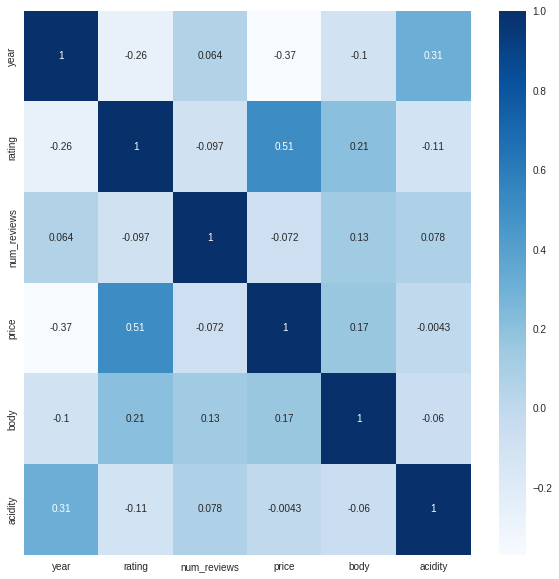

In [ ]:
#Looking for correlations between the numerical variables
print(df.corr())
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

I can see that there is only moderate positive correlation between price and rating, which means that when the rating is high, the price mostly is also high. Most of the other numerical variables don't have much of a correlation on the price.

**Creating multivariate exploratory visuals to further understand data**

Text(0.5, 1.0, "Different type of wine's price based on Acidity")

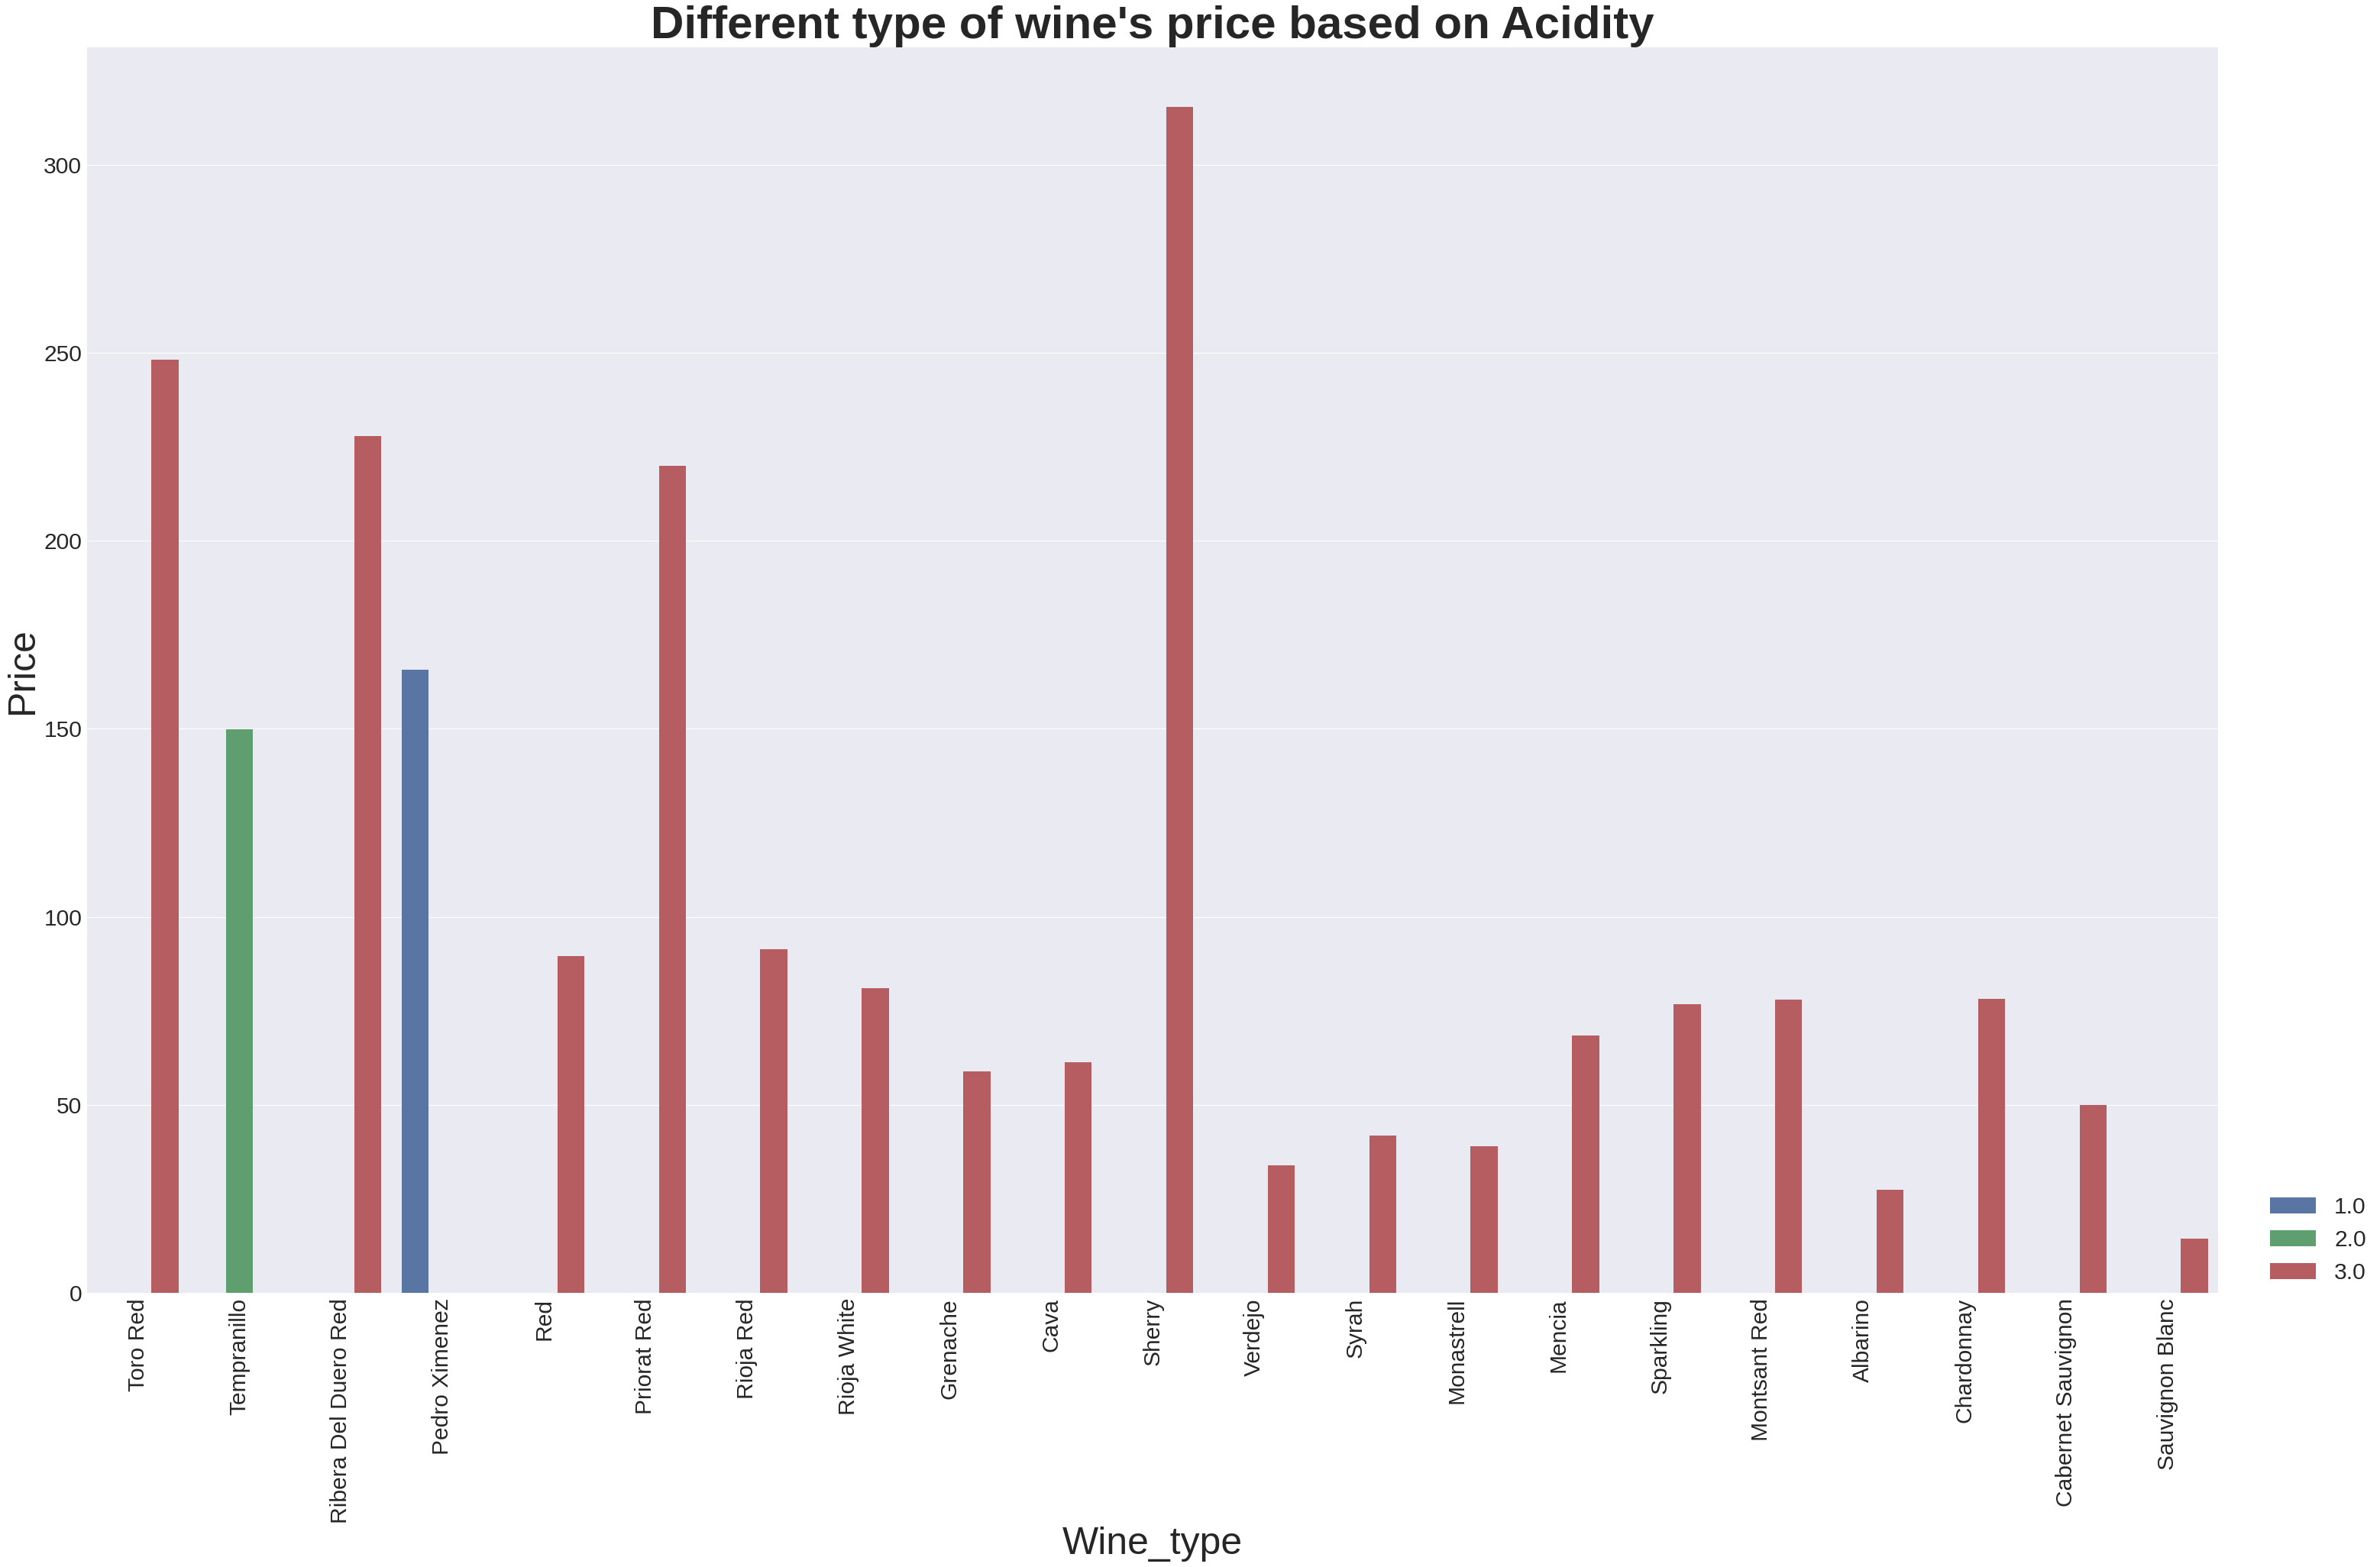

In [ ]:
plt.figure(figsize = (50,30))
sns.barplot(data=df, x='type', y = "price", hue = "acidity", ci=None)
plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc=(1.02,0), fontsize = 30)
plt.xlabel("Wine_type", fontsize = 50)
plt.ylabel("Price", fontsize = 50)
plt.title("Different type of wine's price based on Acidity", fontsize = 60, fontweight = "bold")

Text(0.5, 1.0, "Different type of wine's price based on body")

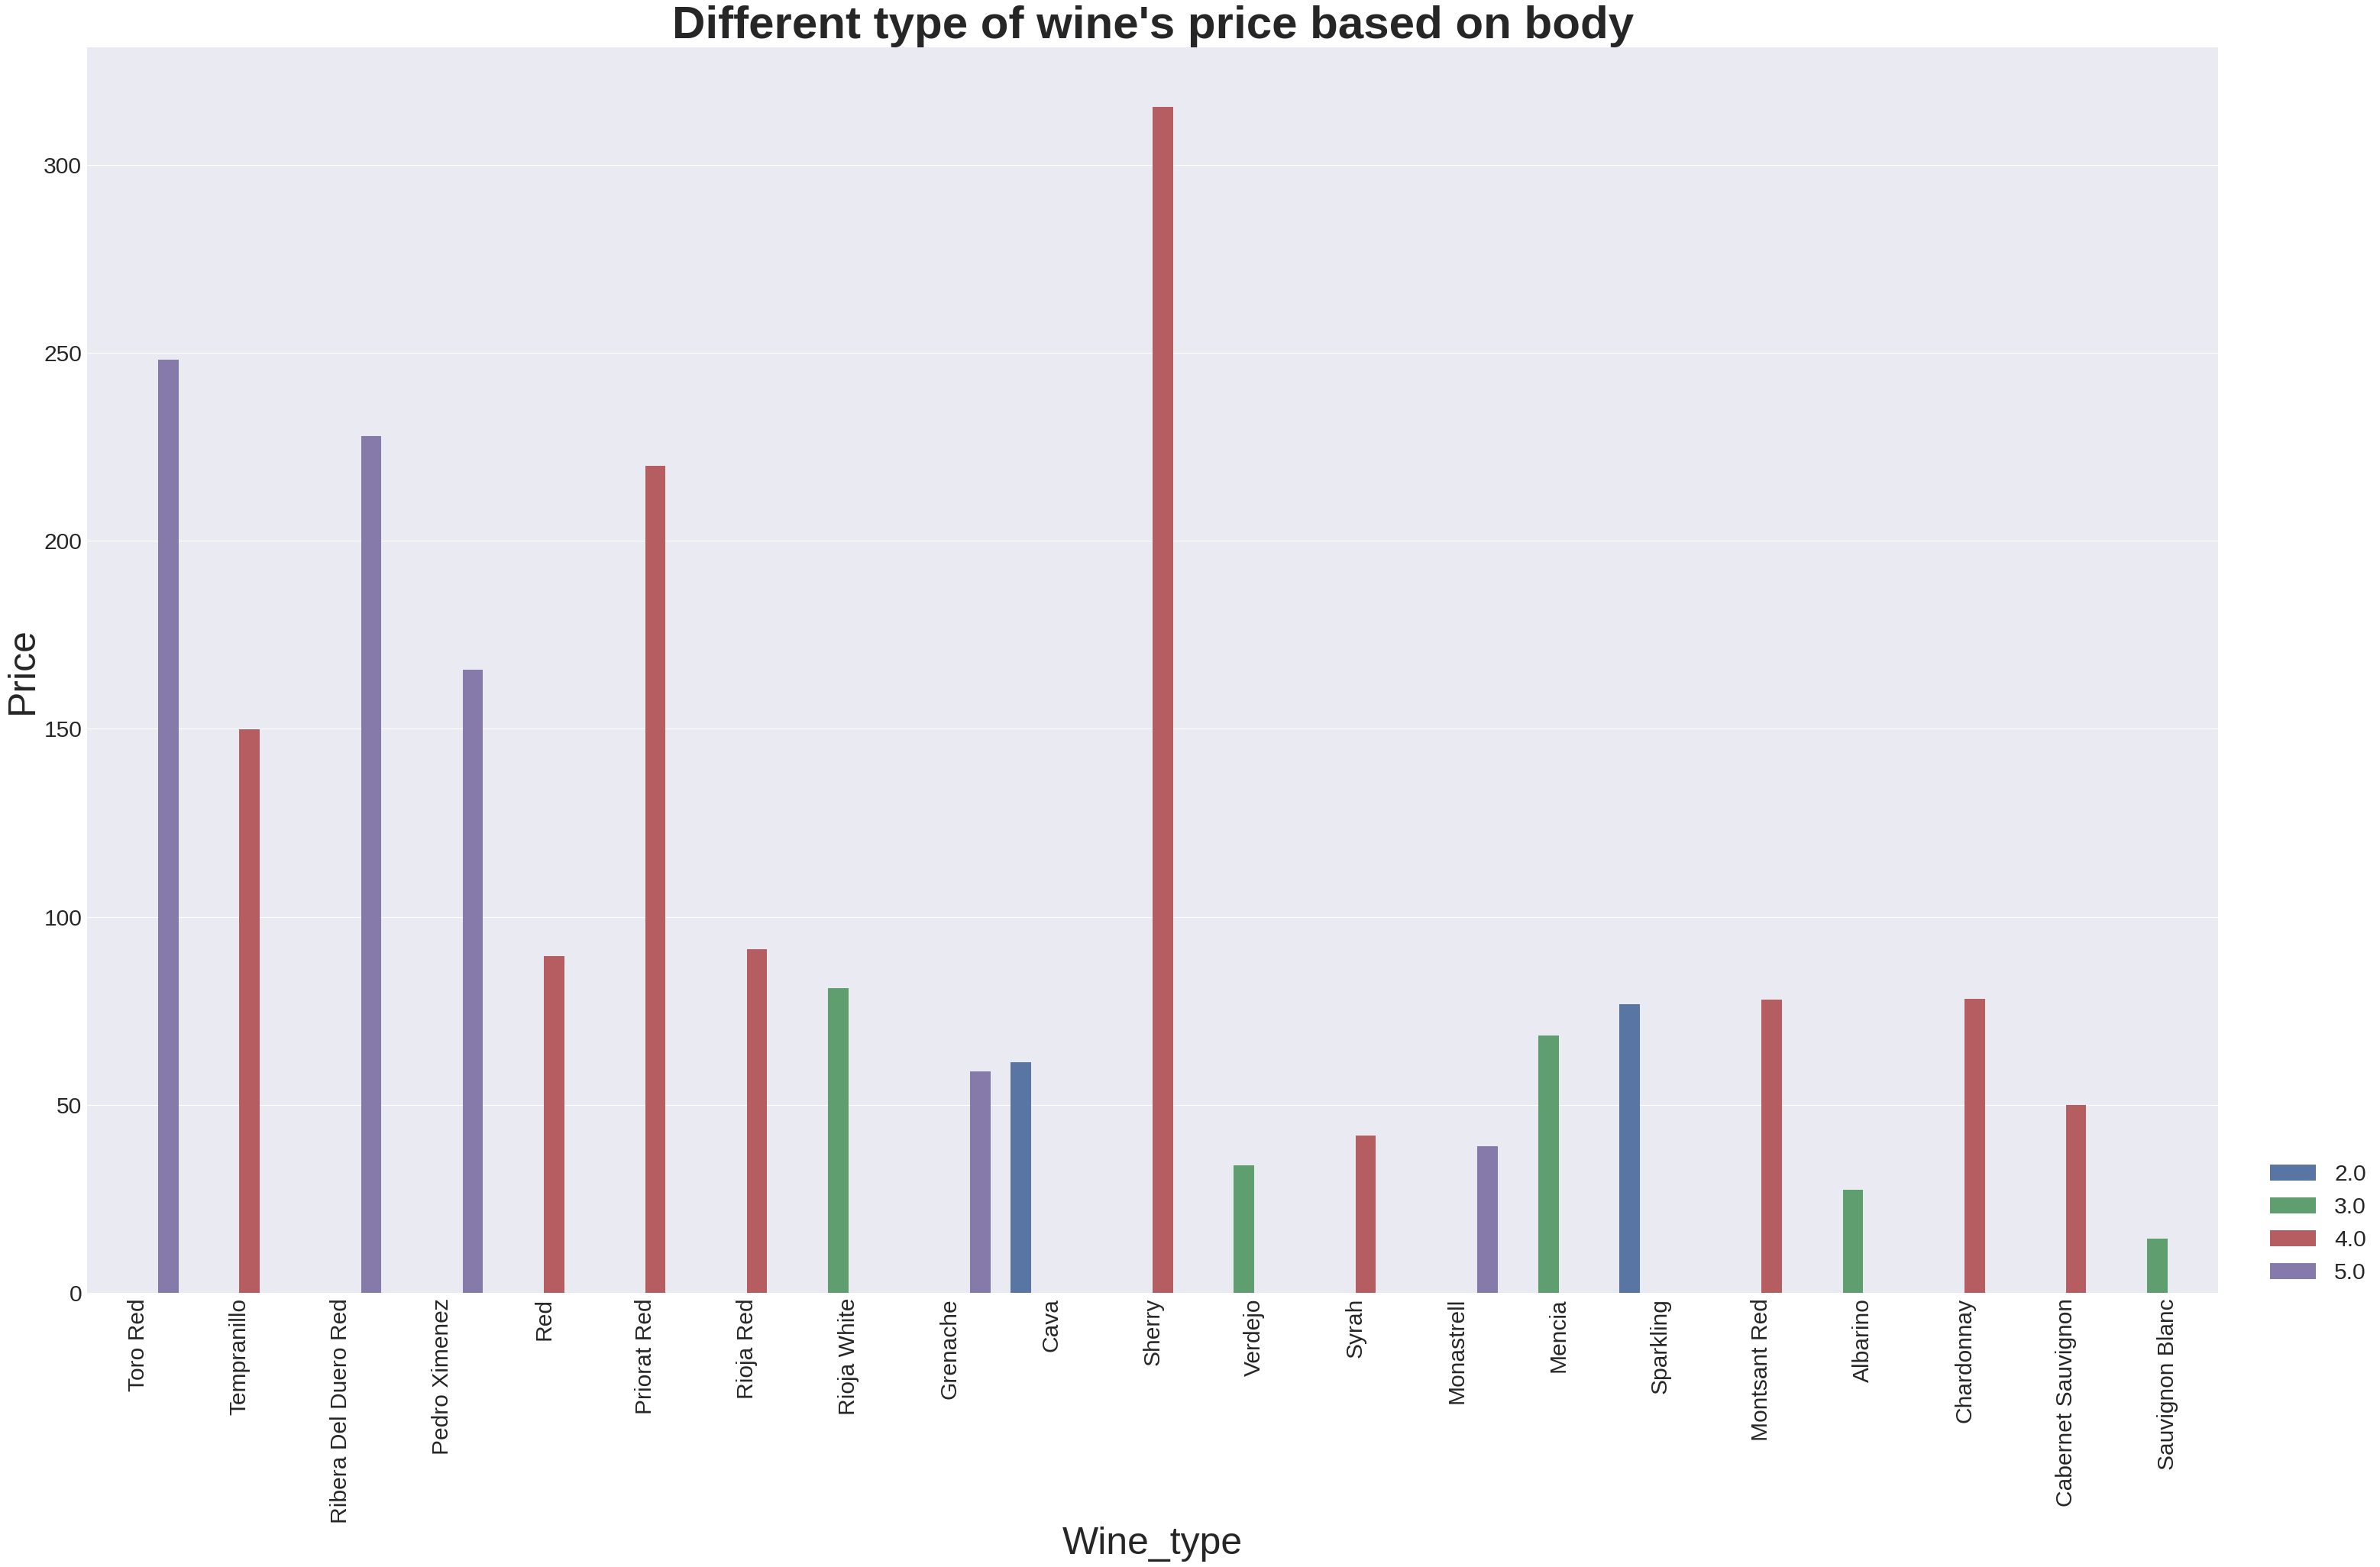

In [ ]:
plt.figure(figsize = (50,30))
sns.barplot(data=df, x='type', y = "price", hue = "body", ci=None)
plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc=(1.02,0), fontsize = 30)
plt.xlabel("Wine_type", fontsize = 50)
plt.ylabel("Price", fontsize = 50)
plt.title("Different type of wine's price based on body", fontsize = 60, fontweight = "bold")

In [ ]:
region_price = df.groupby("region")["price"].mean()

Text(0.5, 1.0, 'Wine price on Different Region')

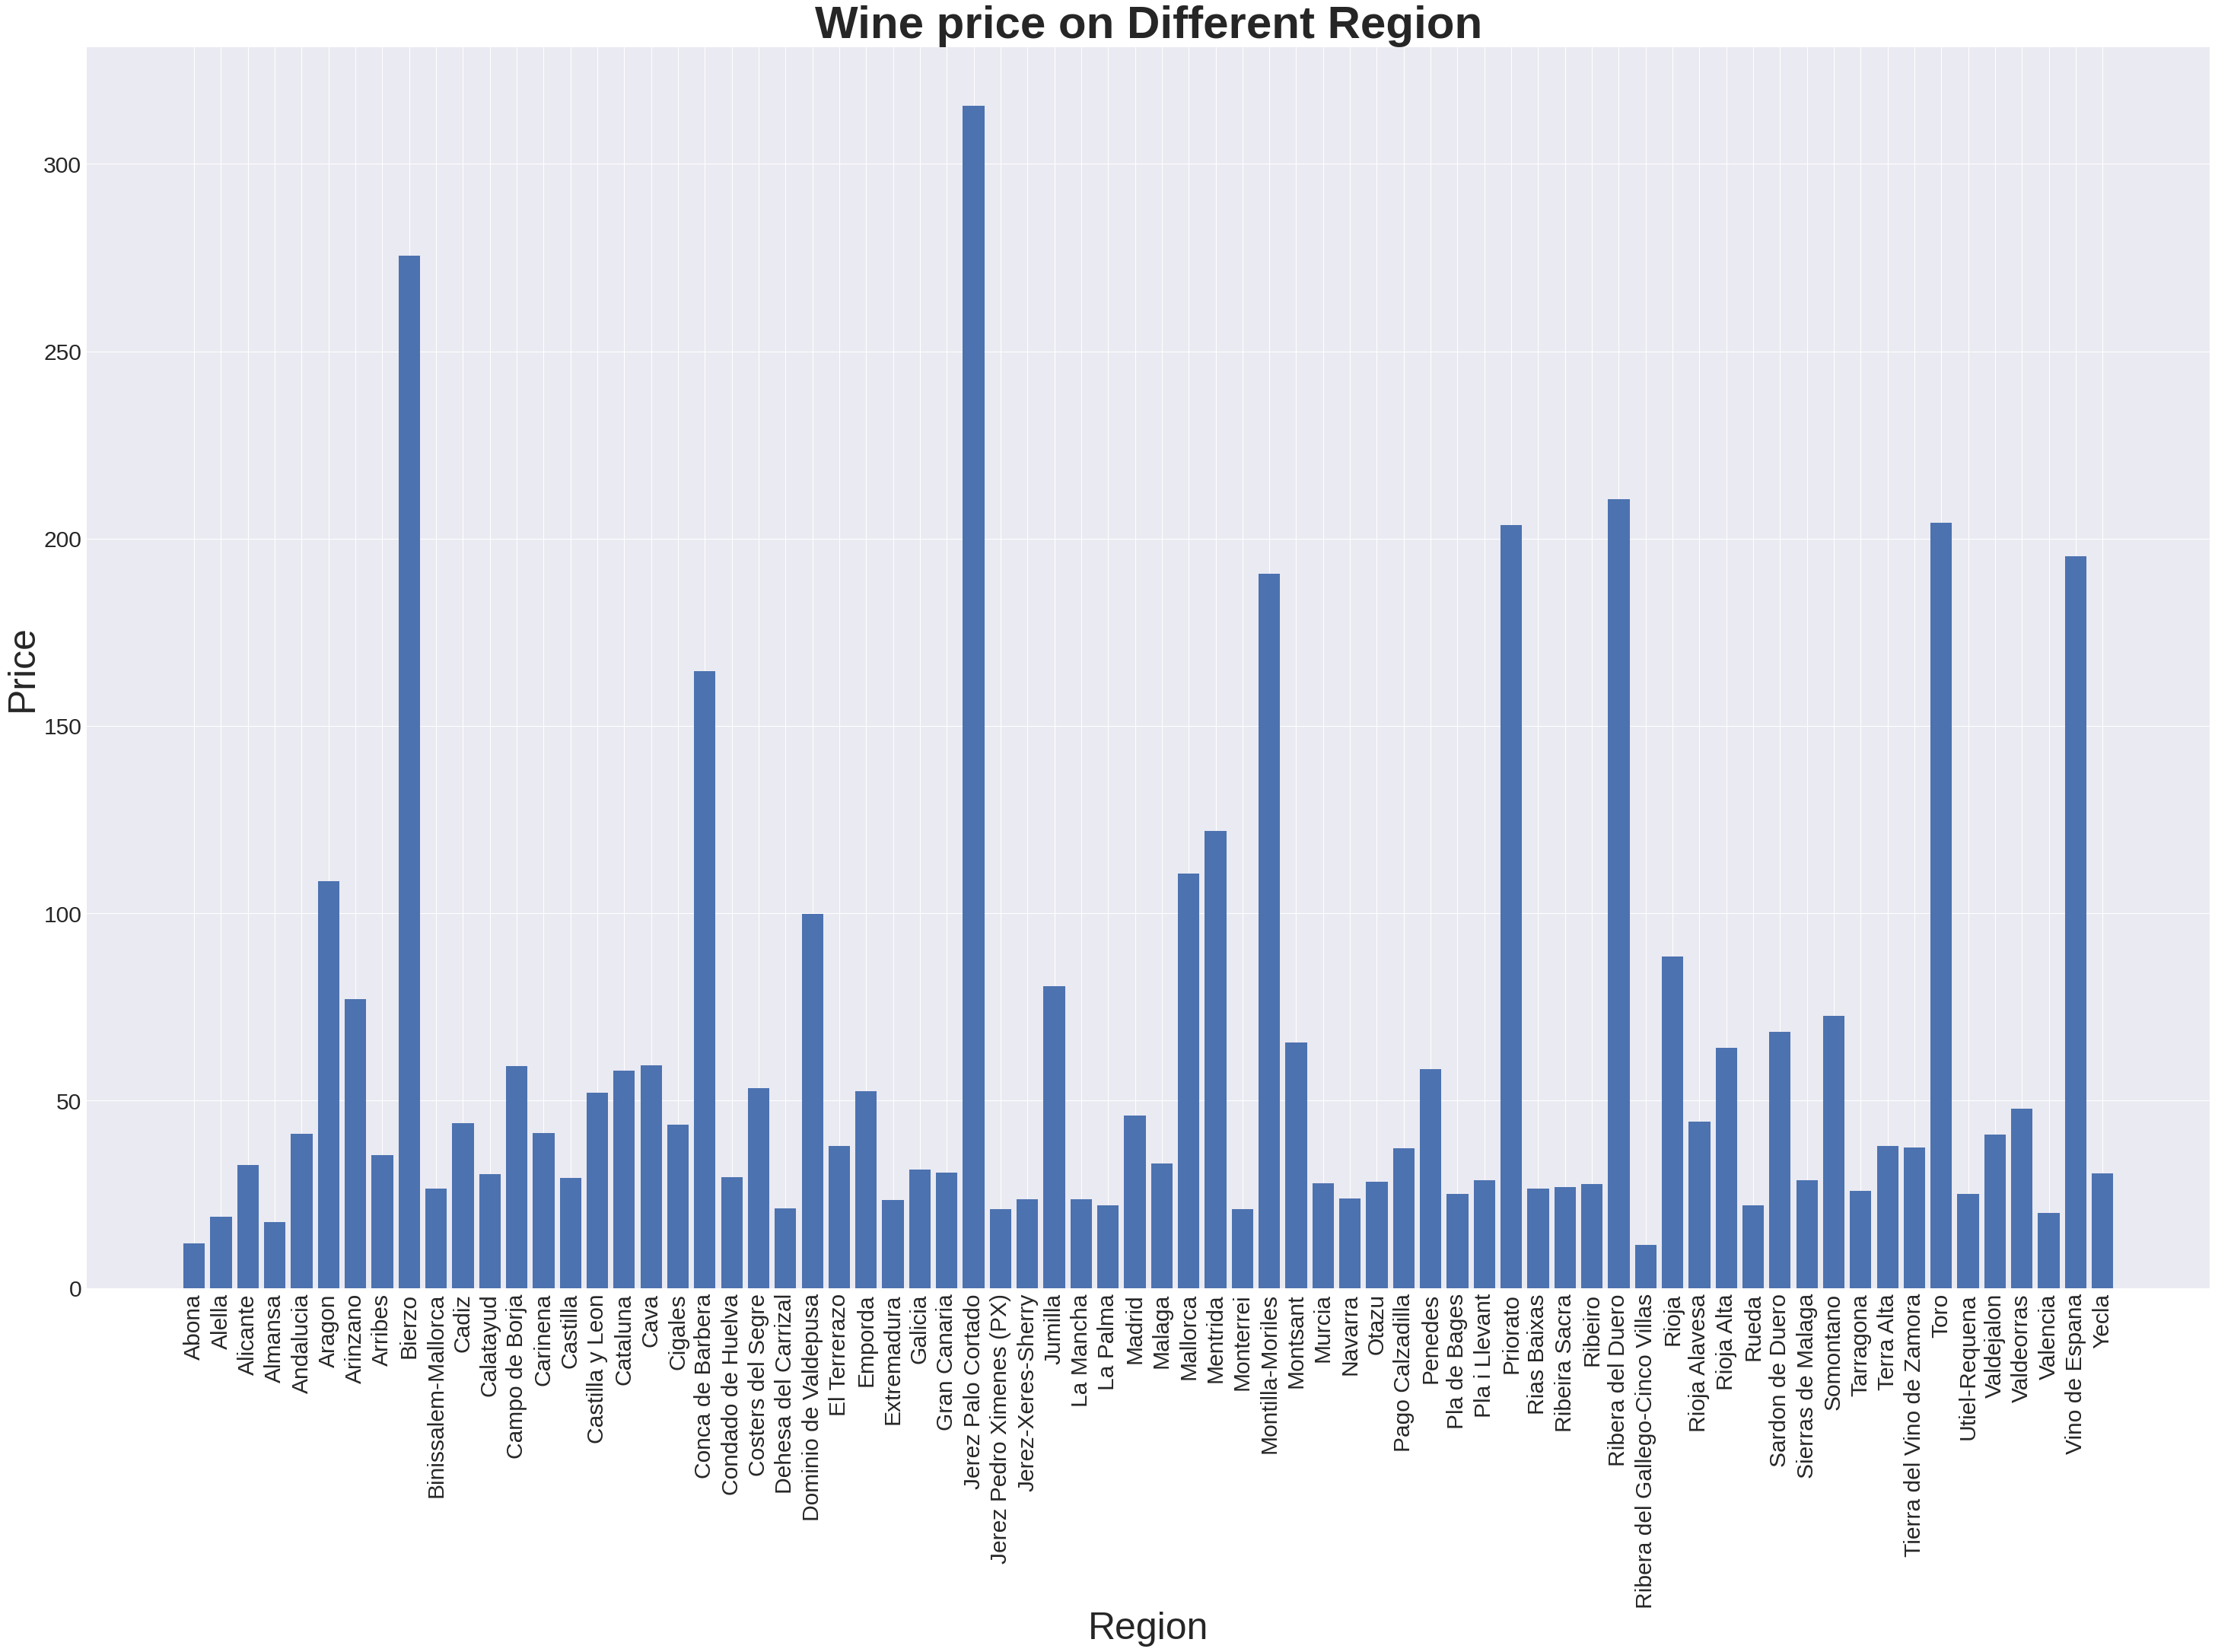

In [ ]:
plt.figure(figsize = (50,30))
plt.bar(region_price.index, region_price.values)
plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("Region", fontsize = 50)
plt.ylabel("Price", fontsize = 50)
plt.title("Wine price on Different Region", fontsize = 60, fontweight = "bold")

In [ ]:
year_price = df.groupby("year")["price"].mean()

Text(0.5, 1.0, 'Wine price on Different Year')

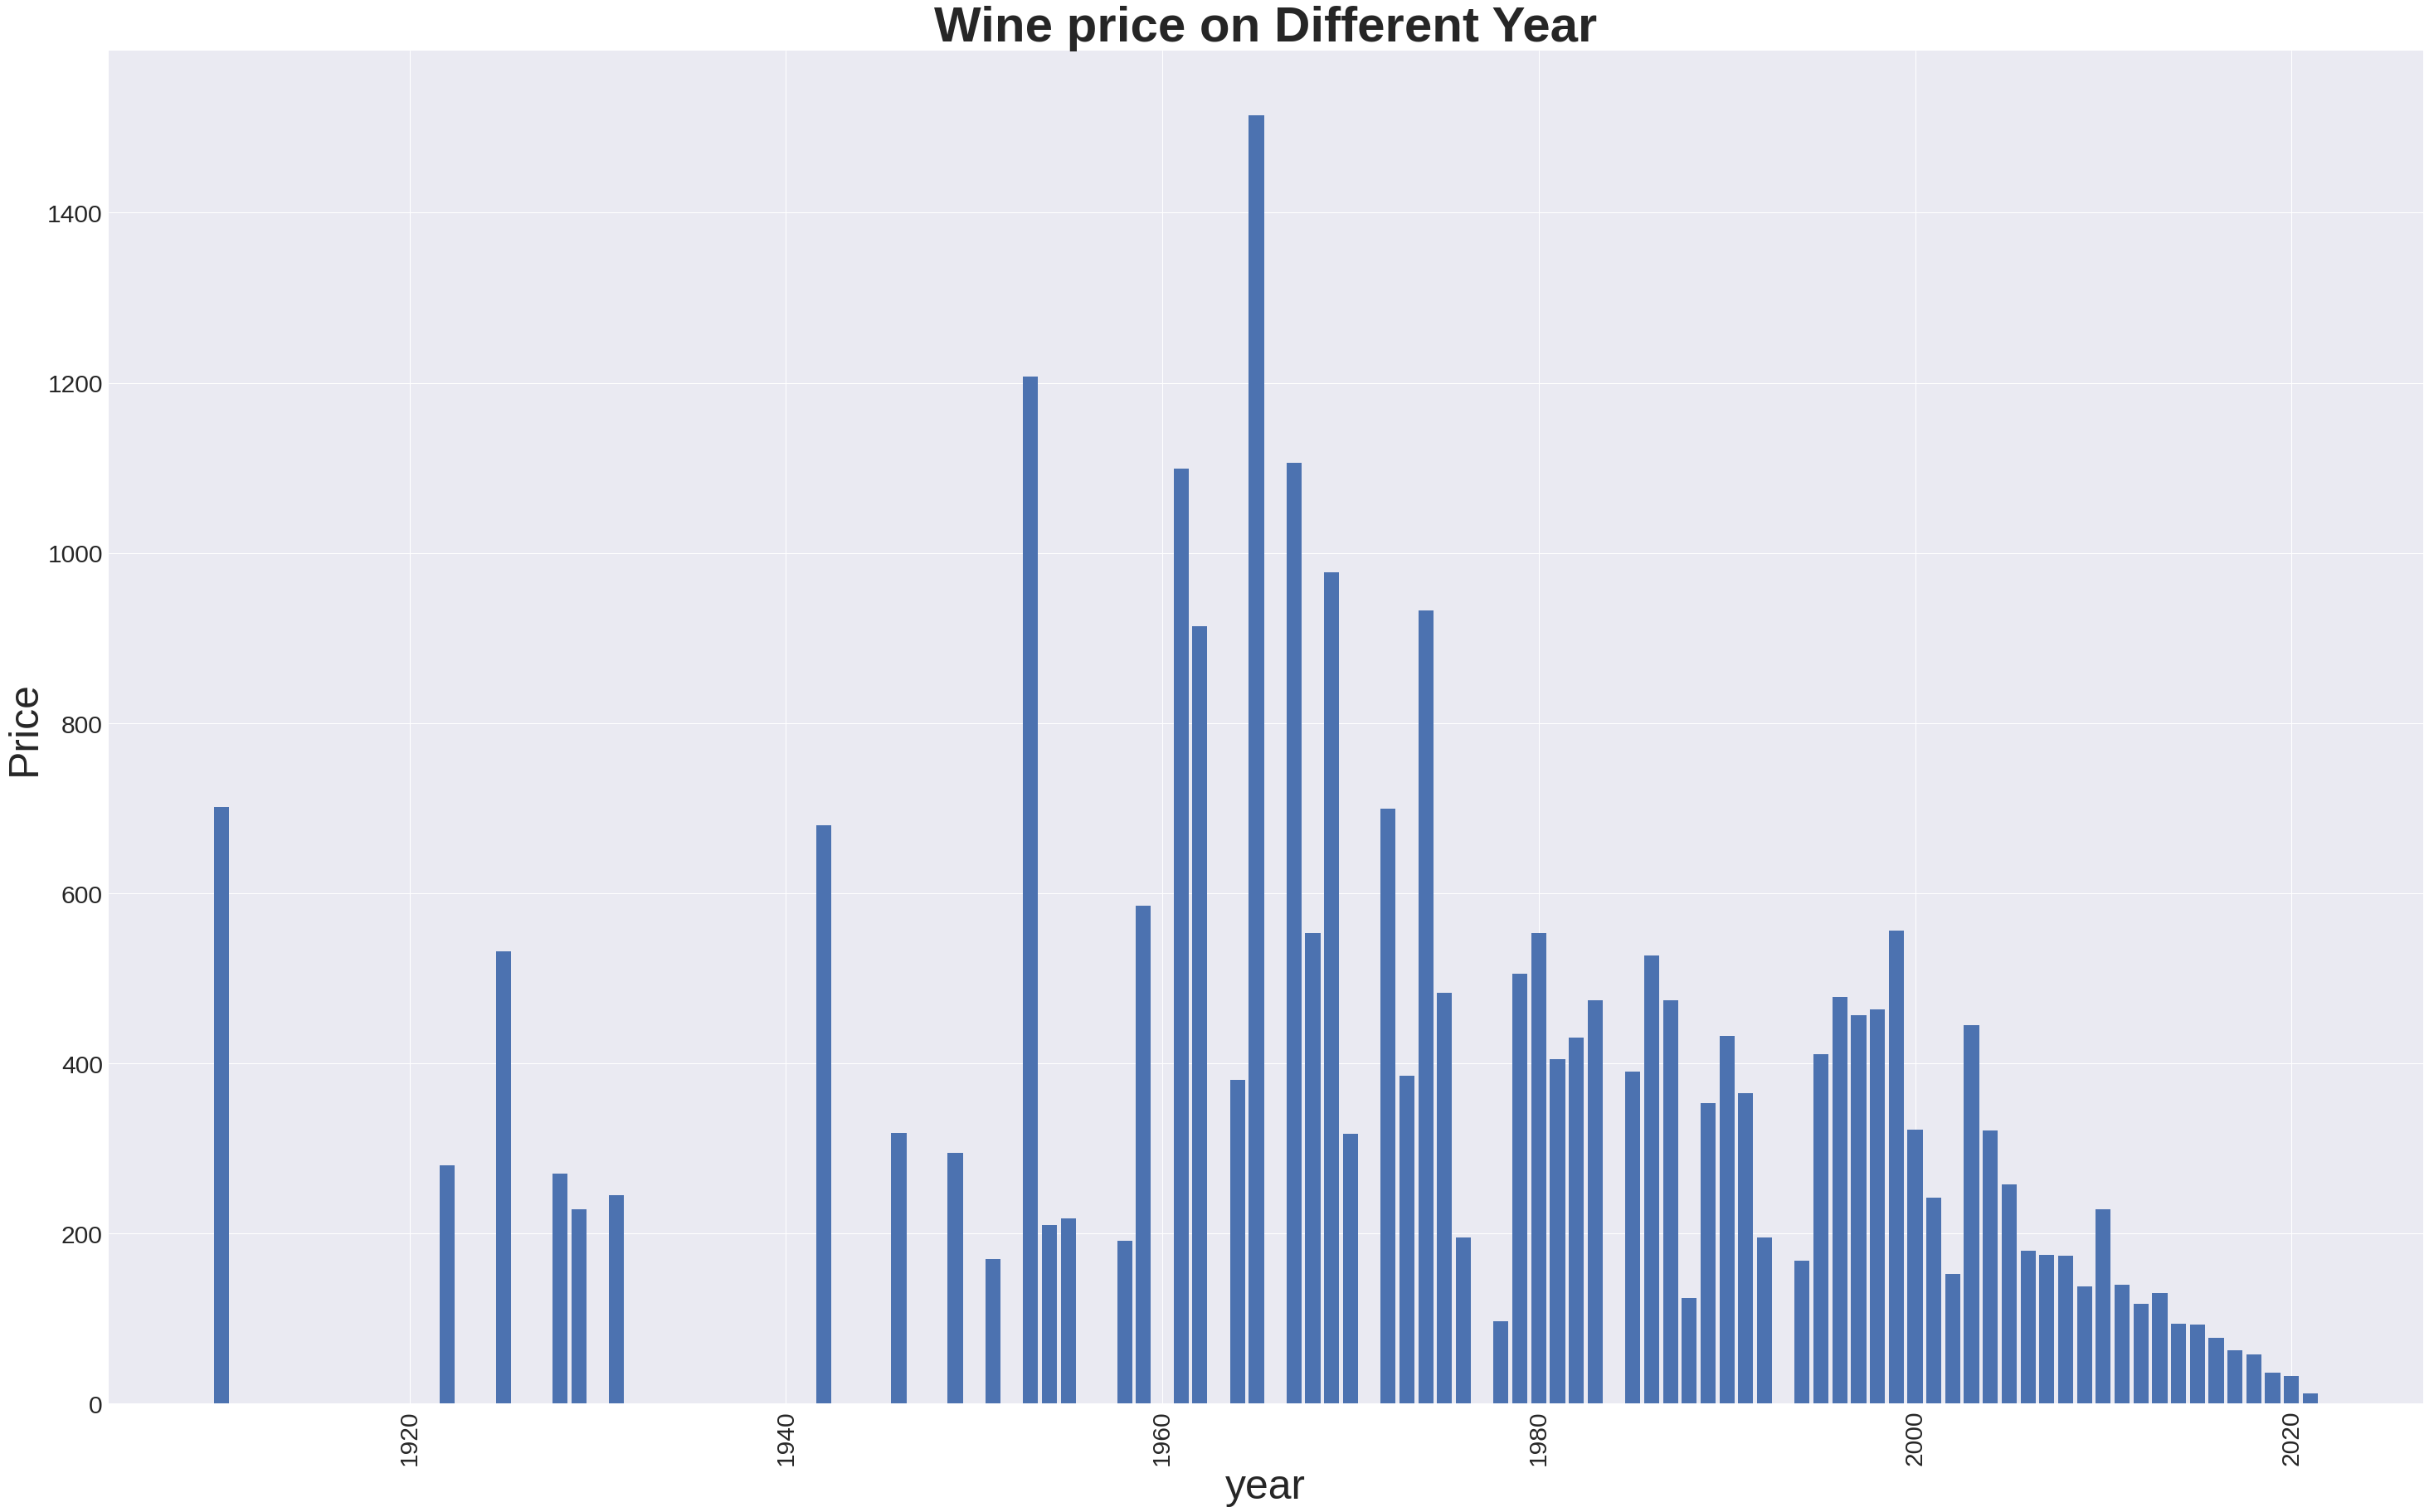

In [ ]:
plt.figure(figsize = (50,30))
plt.bar(year_price.index, year_price.values)
plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("year", fontsize = 50)
plt.ylabel("Price", fontsize = 50)
plt.title("Wine price on Different Year", fontsize = 60, fontweight = "bold")

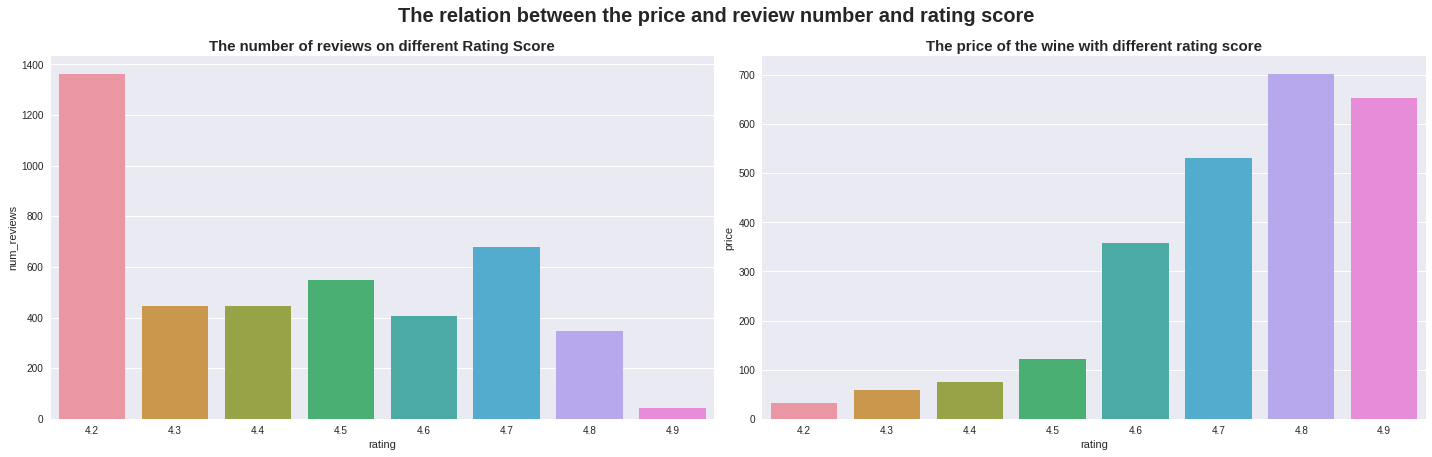

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.barplot(data = df, x = 'rating', y = 'num_reviews', ax=axes[0], ci=None)
axes[0].set_title('The number of reviews on different Rating Score', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'rating', y = 'price', ax=axes[1], ci=None)
axes[1].set_title('The price of the wine with different rating score', fontsize = 15, fontweight = 'bold')

fig.suptitle('The relation between the price and review number and rating score', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout()

**Create two visuals that demonstrate key findings of interest to a stakeholder.** 

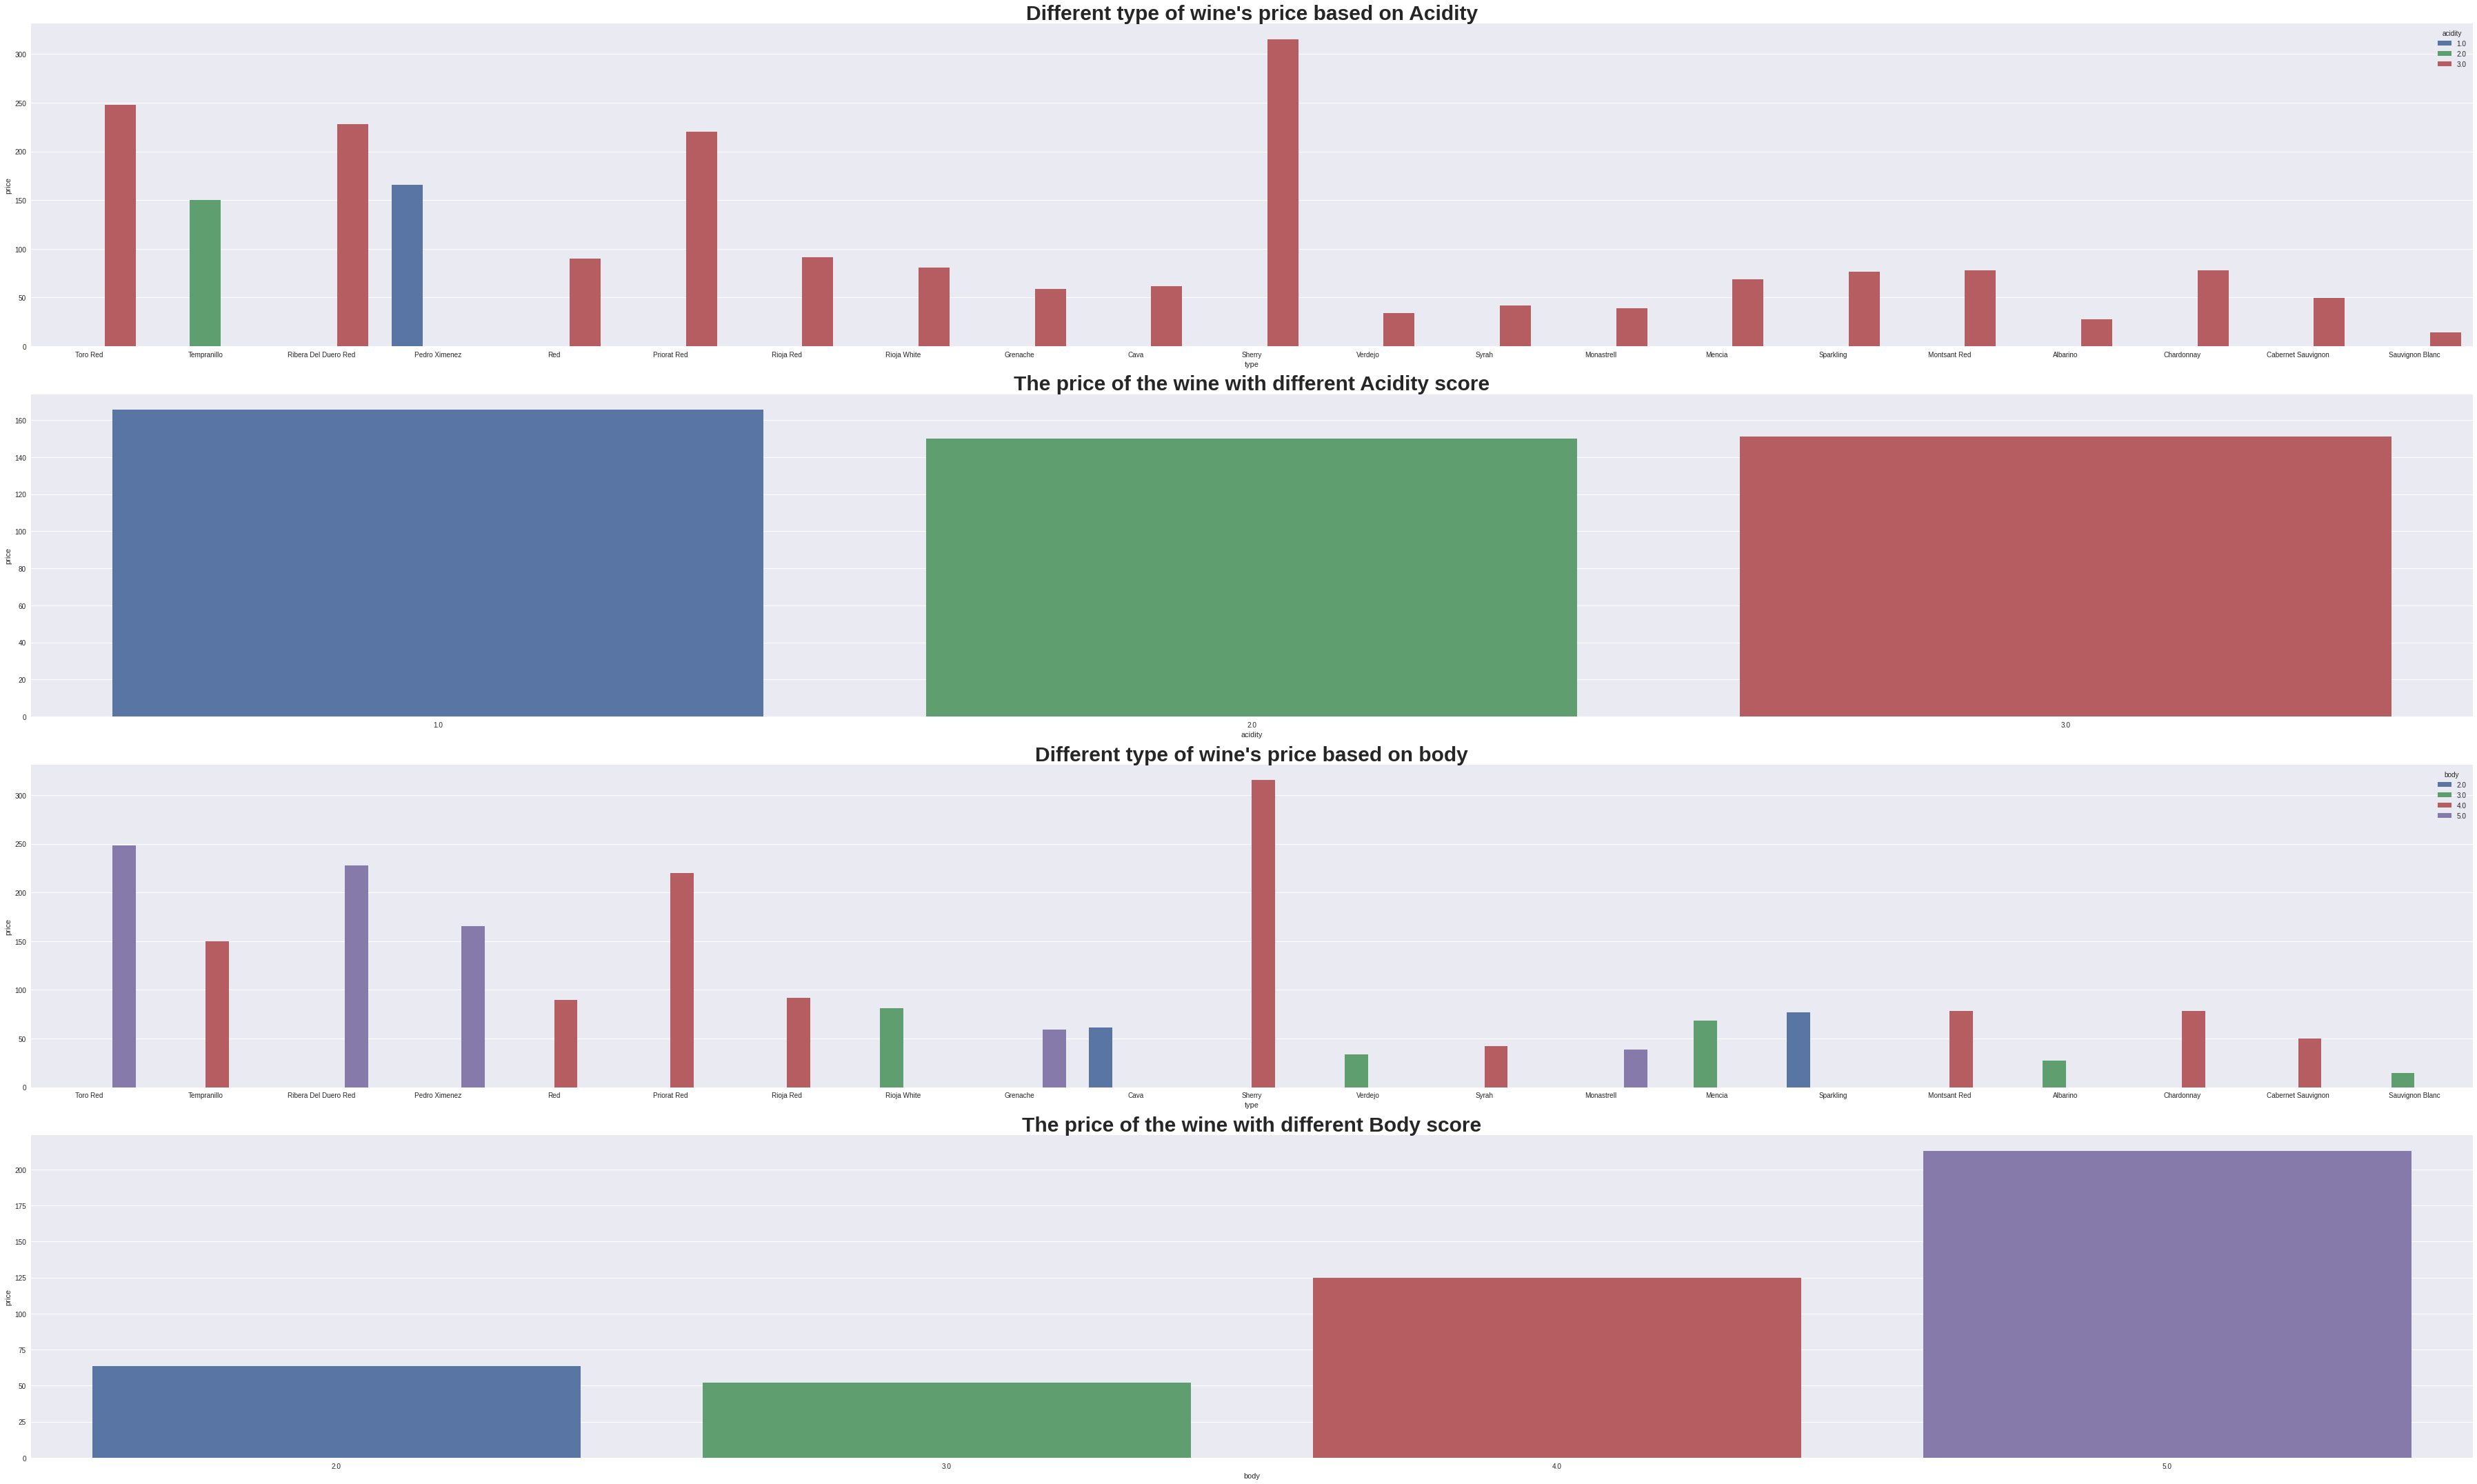

In [ ]:
#Visuliazation for key finding 1:
fig, axes = plt.subplots(nrows=4, figsize=(50,30))

sns.barplot(data = df, x = 'type', y = 'price', hue = "acidity", ax=axes[0],ci=None)
axes[0].set_title("Different type of wine's price based on Acidity", fontsize = 30, fontweight = 'bold')

sns.barplot(data = df, x = 'acidity', y = 'price', ax=axes[1], ci=None)
axes[1].set_title('The price of the wine with different Acidity score', fontsize = 30, fontweight = 'bold')

sns.barplot(data = df, x = 'type', y = 'price',  hue = "body", ax=axes[2], ci=None)
axes[2].set_title("Different type of wine's price based on body", fontsize = 30, fontweight = 'bold')

sns.barplot(data = df, x = 'body', y = 'price', ax=axes[3], ci=None)
axes[3].set_title('The price of the wine with different Body score', fontsize = 30, fontweight = 'bold')

fig.tight_layout()

Findings: 

*   The score of the acidity doesn't make a big influence on the wine's
price, the price of wine with low acidity score and the price of wine with high acidity score are very close. 
*   Almost all the types of wine's acidity is scored at 3.0. Based on that, we can say the price of the wine is simply determined by what type of the wine is. we can see that the type of wine with highest price is "Sherry"


*   The score of the body did make a influence on the wine's price. we can see that the trend is the higher body score, the higher price.
*   we can see that the types of wine with higher price also have the higher body score.The sherry type wine with the highest price, body score is 4.0. Followed by Toro Red type and Ribera Del Duero Red type wine with the highest body score at 5.0.





Text(0.5, 1.0, "Different type of wine's price with different rating score")

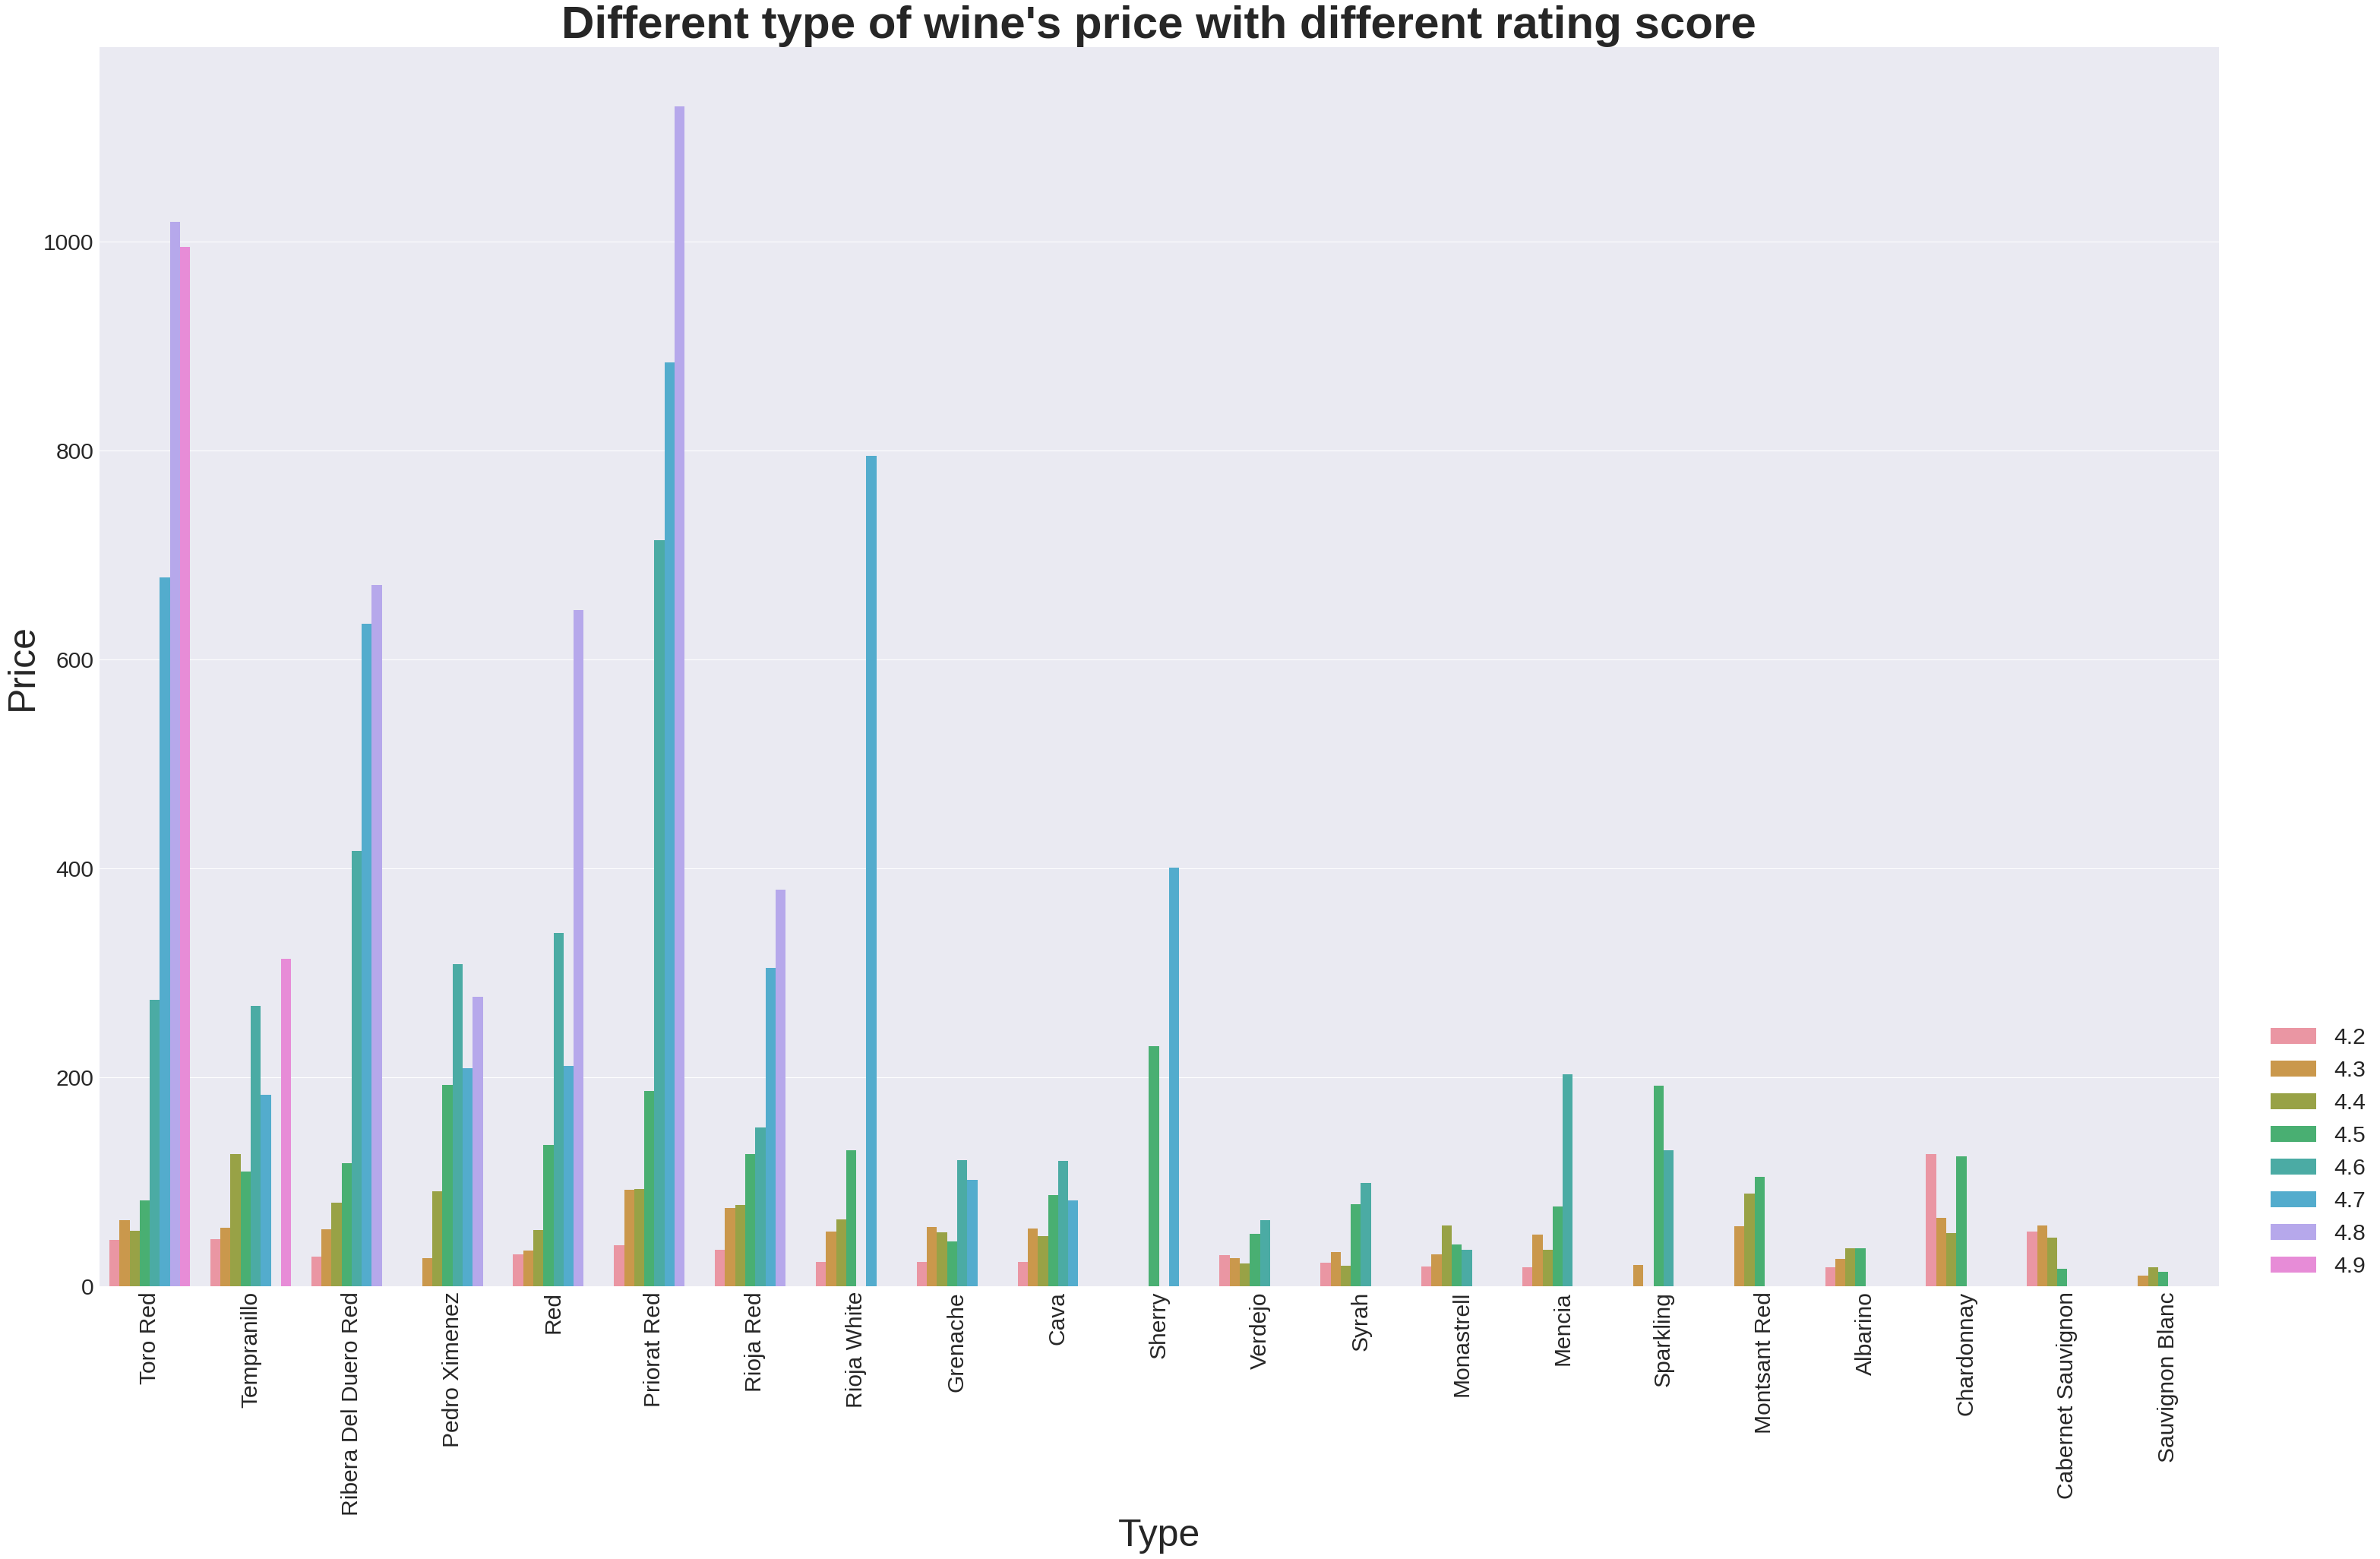

In [ ]:
#Visual for key finding 2:
plt.figure(figsize = (50,30))
sns.barplot(data=df, x='type', y = "price", hue = "rating", ci=None)
plt.xticks(rotation=90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc=(1.02,0), fontsize = 30)
plt.xlabel("Type", fontsize = 50)
plt.ylabel("Price", fontsize = 50)
plt.title("Different type of wine's price with different rating score", fontsize = 60, fontweight = "bold")

Findings:


*   In every type of wine, the wine with low price also has low rating score.
*   The types of wine with low price, for exampe, Sauvignon Blanc, Sparkling, Cabernet Sauvignon. All the wines in these types are rating scored below 4.5. 


*   The type of wine with high price, for example, Sherry, Rioja Red, Ribera Del Duero Red. Only the wines in these types with higher rating score have the higher price. 
*   Summary, the price of the wine is influenced strongly by the rating score.



